# Erzeugung und Messung eines Bell-Zustands

Das Programm definiert einen Schaltkreis (Algorithmus) zur Erzeugung des Bell-Zustands

$$ |\Psi \rangle = \frac{1}{\sqrt{2}} \Big( |00\rangle + |11\rangle \Big) $$

und führt eine Simulation aus, wobei die Messung in einer gedrehten Basis erfolgt.

In [1]:
# import qiskit stuff
import qiskit
from qiskit import QuantumCircuit,execute, Aer
from qiskit.circuit import QuantumCircuit,Parameter
from qiskit.tools.visualization import circuit_drawer
from qiskit.visualization import plot_histogram

#import python stuff
import matplotlib.pyplot as plt
import numpy as np

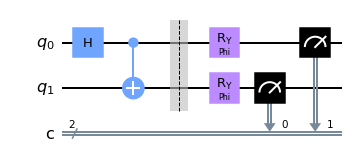

In [2]:
# Definition eines freien Parameters
phi = Parameter('Phi')

# Erzeugung des Schaltkreis mit
# zwei Qubits und zwei klassischen Bits
circuit = QuantumCircuit(2,2)

circuit.h(0)
circuit.cx(0,1)

circuit.barrier()

# Drehung der Messbasis, phi ist ein freie Parameter
circuit.ry(phi,0) 
circuit.ry(phi,1)

circuit.measure([1,0],[0,1]) # Vertausche die Messreihenfolge
circuit.draw('mpl')

In [3]:
# Setze konkreten Wert für den Parameter
circuit = circuit.bind_parameters({phi: 2*np.arccos( 1/np.sqrt(3) )})

{'11': 5004, '00': 4996}


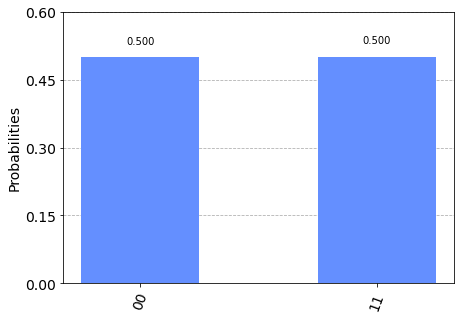

In [4]:
# Ausführen einer Simulation
backend = Aer.get_backend('qasm_simulator')

job = execute(circuit, backend, shots=10000)
result = job.result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)